### Categorical Cross-Entropy Loss

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import nnfs
from nnfs.datasets import vertical_data
from nnfs.datasets import spiral_data

nnfs.init()

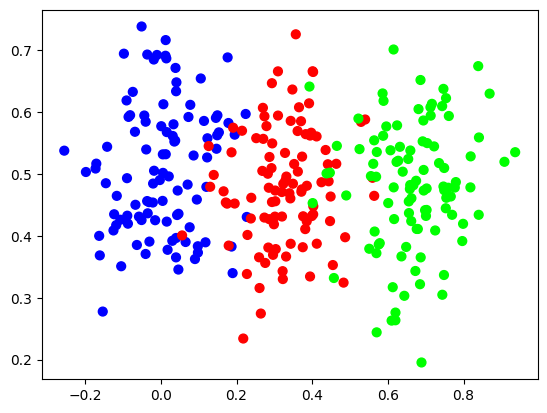

In [2]:
X, y = vertical_data( samples = 100, classes = 3 )

plt.scatter( X[:, 0], X[:, 1], c = y, s = 40, cmap = 'brg' )
plt.show()

In [3]:
# 
class Layer_Dense:
  def __init__( self, n_inputs, n_neuros ):
    self.weights = 0.01 * np.random.randn( n_inputs, n_neuros )
    self.biases = np.zeros( ( 1, n_neuros ) )

  def forward( self, inputs ):
    self.output = np.dot( inputs, self.weights ) + self.biases

# ReLU activation
class Activation_ReLU:
  def forward( self, inputs ):
    self.output = np.maximum( 0, inputs )

# Softmax activation
class Activation_Softmax:
  def forward( self, inputs ):
    exp_values = np.exp( inputs - np.max( inputs, axis = 1, keepdims = True ) )
    probabilities = exp_values / np.sum( exp_values, axis = 1, keepdims = True )
    self.output = probabilities

class Loss:
  def calculate( self, output, y ):
    sample_losses = self.forward( output, y )
    data_loss = np.mean( sample_losses )
    return data_loss
  
class Loss_CategoricalCrossentropy( Loss ):
  def forward( self, y_pred, y_true ):
    samples = len(y_pred)
    y_pred_clipped = np.clip( y_pred, 1e-7, 1 - 1e-7 )

    if len(y_true.shape ) == 1:
      correct_confidences = y_pred_clipped[
        range( samples ),
        y_true
      ]

    elif len( y_true.shape ) == 2:
      correct_confidences = np.sum(
        y_pred_clipped * y_true,
        axis = 1
      )

    negative_log_likelihoods = -np.log( correct_confidences )
    return negative_log_likelihoods

In [4]:
X, y = vertical_data( samples = 100, classes = 3 )

dense1 = Layer_Dense( 2, 3 )
activation1 = Activation_ReLU()
dense2 = Layer_Dense( 3, 3 )
activation2 = Activation_Softmax()

loss_function = Loss_CategoricalCrossentropy()



In [5]:
lowest_loss = 9999999
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()


In [6]:
for iteration in range(100000):

  # Generate a new set of weights for iteration
  dense1.weights = 0.05 * np.random.randn( 2, 3 )
  dense1.biases = 0.05 * np.random.randn( 1, 3 )
  dense2.weights = 0.05 * np.random.randn( 3, 3 )
  dense2.biases = 0.05 * np.random.randn( 1, 3 )

  # Perform a forward pass of the training data through this layer
  dense1.forward( X )
  activation1.forward( dense1.output )
  dense2.forward( activation1.output )
  activation2.forward( dense2.output )

  # Perform a forward pass through activation function
  # it takes the output of second dense layer here and returns loss
  dense1.forward(X)
  activation1.forward( dense1.output )
  dense2.forward( activation1.output )
  activation2.forward( dense2.output )

  # Perform a forward pass through activation function
  # it takes the output of second dense layer here and returns loss
  loss = loss_function.calculate( activation2.output, y )

  # Calculate accuracy from output of activation2 and targets
  # calculate values along first axis
  predictions = np.argmax( activation2.output, axis = 1 )
  accuracy = np.mean( predictions == y )

  # If loss is smaller - print and save weights and biases aside
  if loss < lowest_loss:
    print( 'New set of weights found, iteration:', iteration, 'loss:', loss, 'accuracy:', accuracy )
    best_dense1_weights = dense1.weights.copy()
    best_dense1_biases = dense1.biases.copy()
    best_dense2_weights = dense2.weights.copy()
    best_dense2_biases = dense2.biases.copy()
    lowest_loss = loss

New set of weights found, iteration: 0 loss: 1.1016203 accuracy: 0.3333333333333333
New set of weights found, iteration: 1 loss: 1.1002508 accuracy: 0.3333333333333333
New set of weights found, iteration: 2 loss: 1.0992025 accuracy: 0.3333333333333333
New set of weights found, iteration: 3 loss: 1.0986239 accuracy: 0.3333333333333333
New set of weights found, iteration: 10 loss: 1.0984299 accuracy: 0.3333333333333333
New set of weights found, iteration: 22 loss: 1.0976521 accuracy: 0.36333333333333334
New set of weights found, iteration: 150 loss: 1.0974255 accuracy: 0.3333333333333333
New set of weights found, iteration: 874 loss: 1.0972673 accuracy: 0.3333333333333333
New set of weights found, iteration: 894 loss: 1.096895 accuracy: 0.3333333333333333
New set of weights found, iteration: 1036 loss: 1.0954281 accuracy: 0.3333333333333333
New set of weights found, iteration: 88633 loss: 1.0952065 accuracy: 0.3333333333333333


In [7]:
for iteration in range(100000):

  # Generate a new set of weights for iteration
  dense1.weights = 0.05 * np.random.randn( 2, 3 )
  dense1.biases = 0.05 * np.random.randn( 1, 3 )
  dense2.weights = 0.05 * np.random.randn( 3, 3 )
  dense2.biases = 0.05 * np.random.randn( 1, 3 )

  # Perform a forward pass of the training data through this layer
  dense1.forward( X )
  activation1.forward( dense1.output )
  dense2.forward( activation1.output )
  activation2.forward( dense2.output )

  # Perform a forward pass through activation function
  # it takes the output of second dense layer here and returns loss
  dense1.forward(X)
  activation1.forward( dense1.output )
  dense2.forward( activation1.output )
  activation2.forward( dense2.output )

  # Perform a forward pass through activation function
  # it takes the output of second dense layer here and returns loss
  loss = loss_function.calculate( activation2.output, y )

  # Calculate accuracy from output of activation2 and targets
  # calculate values along first axis
  predictions = np.argmax( activation2.output, axis = 1 )
  accuracy = np.mean( predictions == y )

  # If loss is smaller - print and save weights and biases aside
  if loss < lowest_loss:
    print( 'New set of weights found, iteration:', iteration, 'loss:', loss, 'accuracy:', accuracy )
    best_dense1_weights = dense1.weights.copy()
    best_dense1_biases = dense1.biases.copy()
    best_dense2_weights = dense2.weights.copy()
    best_dense2_biases = dense2.biases.copy()
    lowest_loss = loss
  else:
    dense1.weights = best_dense1_weights.copy()
    dense1.biases = best_dense1_biases.copy()
    dense2.weights = best_dense2_weights.copy()
    dense2.biases = best_dense2_biases.copy()
    if iteration % 100 == 0:
      print( 'Iteration:', iteration, 'loss:', loss, 'accuracy:', accuracy )

Iteration: 0 loss: 1.0990562 accuracy: 0.3333333333333333
Iteration: 100 loss: 1.0985419 accuracy: 0.3333333333333333
Iteration: 200 loss: 1.1005669 accuracy: 0.3333333333333333
Iteration: 300 loss: 1.0998625 accuracy: 0.3333333333333333
Iteration: 400 loss: 1.099577 accuracy: 0.3333333333333333
Iteration: 500 loss: 1.0993912 accuracy: 0.3333333333333333
Iteration: 600 loss: 1.0984994 accuracy: 0.3333333333333333
Iteration: 700 loss: 1.0983841 accuracy: 0.3333333333333333
Iteration: 800 loss: 1.099354 accuracy: 0.3333333333333333
Iteration: 900 loss: 1.0993445 accuracy: 0.3333333333333333
Iteration: 1000 loss: 1.0991422 accuracy: 0.3333333333333333
Iteration: 1100 loss: 1.0999177 accuracy: 0.3333333333333333
Iteration: 1200 loss: 1.1007141 accuracy: 0.3333333333333333
Iteration: 1300 loss: 1.0988384 accuracy: 0.3333333333333333
Iteration: 1400 loss: 1.0991575 accuracy: 0.3333333333333333
Iteration: 1500 loss: 1.0988421 accuracy: 0.3333333333333333
Iteration: 1600 loss: 1.0985057 accura

In [8]:
X, y = vertical_data( samples = 100, classes = 3 )

dense1 = Layer_Dense( 2, 3 )
activation1 = Activation_ReLU()
dense2 = Layer_Dense( 3, 3 )
activation2 = Activation_Softmax()

loss_function = Loss_CategoricalCrossentropy()

lowest_loss = 9999999
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

for iteration in range(10000):
  dense1.weights += 0.05 * np.random.randn( 2, 3 )
  dense1.biases += 0.05 * np.random.randn( 1, 3 )
  dense2.weights += 0.05 * np.random.randn( 3, 3 )
  dense2.biases += 0.05 * np.random.randn( 1, 3 )

  dense1.forward( X )
  activation1.forward( dense1.output )
  dense2.forward( activation1.output )
  activation2.forward( dense2.output )

  loss = loss_function.calculate( activation2.output, y )

  predictions = np.argmax( activation2.output, axis = 1 )
  accuracy = np.mean( predictions == y )

  if loss < lowest_loss:
    print( 'New set of weights found, iteration: ', iteration, 'loss:', loss, 'accuracy:', accuracy )
    best_dense1_weights = dense1.weights.copy()
    best_dense1_biases = dense1.biases.copy()
    best_dense2_weights = dense2.weights.copy()
    best_dense2_biases = dense2.biases.copy()
    lowest_loss = loss
  else:
    dense1.weights = best_dense1_weights.copy()
    dense1.biases = best_dense1_biases.copy()
    dense2.weights = best_dense2_weights.copy()
    dense2.biases = best_dense2_biases.copy()

New set of weights found, iteration:  0 loss: 1.1008958 accuracy: 0.3333333333333333
New set of weights found, iteration:  2 loss: 1.0981394 accuracy: 0.3333333333333333
New set of weights found, iteration:  7 loss: 1.0974602 accuracy: 0.3333333333333333
New set of weights found, iteration:  8 loss: 1.0967084 accuracy: 0.3333333333333333
New set of weights found, iteration:  10 loss: 1.0948716 accuracy: 0.3333333333333333
New set of weights found, iteration:  16 loss: 1.0937078 accuracy: 0.3333333333333333
New set of weights found, iteration:  17 loss: 1.0928943 accuracy: 0.3333333333333333
New set of weights found, iteration:  19 loss: 1.0919755 accuracy: 0.3333333333333333
New set of weights found, iteration:  23 loss: 1.0832859 accuracy: 0.3333333333333333
New set of weights found, iteration:  27 loss: 1.0811269 accuracy: 0.3333333333333333
New set of weights found, iteration:  41 loss: 1.0806018 accuracy: 0.3333333333333333
New set of weights found, iteration:  46 loss: 1.0787253 a

In [9]:
X, y = spiral_data( samples = 100, classes = 3 )

dense1 = Layer_Dense( 2, 3 )
activation1 = Activation_ReLU()
dense2 = Layer_Dense( 3, 3 )
activation2 = Activation_Softmax()

loss_function = Loss_CategoricalCrossentropy()

lowest_loss = 9999999
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

for iteration in range(10000):
  dense1.weights += 0.05 * np.random.randn( 2, 3 )
  dense1.biases += 0.05 * np.random.randn( 1, 3 )
  dense2.weights += 0.05 * np.random.randn( 3, 3 )
  dense2.biases += 0.05 * np.random.randn( 1, 3 )

  dense1.forward( X )
  activation1.forward( dense1.output )
  dense2.forward( activation1.output )
  activation2.forward( dense2.output )

  loss = loss_function.calculate( activation2.output, y )

  predictions = np.argmax( activation2.output, axis = 1 )
  accuracy = np.mean( predictions == y )

  if loss < lowest_loss:
    print( 'New set of weights found, iteration: ', iteration, 'loss:', loss, 'accuracy:', accuracy )
    best_dense1_weights = dense1.weights.copy()
    best_dense1_biases = dense1.biases.copy()
    best_dense2_weights = dense2.weights.copy()
    best_dense2_biases = dense2.biases.copy()
    lowest_loss = loss
  else:
    dense1.weights = best_dense1_weights.copy()
    dense1.biases = best_dense1_biases.copy()
    dense2.weights = best_dense2_weights.copy()
    dense2.biases = best_dense2_biases.copy()

New set of weights found, iteration:  0 loss: 1.0989841 accuracy: 0.3333333333333333
New set of weights found, iteration:  5 loss: 1.0985172 accuracy: 0.29333333333333333
New set of weights found, iteration:  13 loss: 1.0984391 accuracy: 0.3333333333333333
New set of weights found, iteration:  16 loss: 1.0982418 accuracy: 0.33666666666666667
New set of weights found, iteration:  25 loss: 1.0980343 accuracy: 0.30333333333333334
New set of weights found, iteration:  29 loss: 1.0977371 accuracy: 0.35333333333333333
New set of weights found, iteration:  40 loss: 1.0966029 accuracy: 0.36666666666666664
New set of weights found, iteration:  43 loss: 1.0962476 accuracy: 0.32666666666666666
New set of weights found, iteration:  48 loss: 1.0958838 accuracy: 0.37333333333333335
New set of weights found, iteration:  49 loss: 1.0957837 accuracy: 0.3566666666666667
New set of weights found, iteration:  56 loss: 1.0953637 accuracy: 0.37666666666666665
New set of weights found, iteration:  61 loss: 1